<a href="https://colab.research.google.com/github/Ekram49/Capstone_cyclistic/blob/main/Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Welcome to the Cyclistic bike-share analysis case study notebook!. In this notebook I've analyzed Cyclistic customer datasets to answer few key questions


*   How do annual members and casual riders use Cyclistic bikes differently?
*   Why would casual riders buy Cyclistic annual memberships?
*   How can Cyclistic use digital media to influence casual riders to become members?





**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# preparing the datasets

**Importing all the datasets**

In [ ]:
df_q1_2018 = pd.read_csv('Divvy_Trips_2018_Q1.csv')
df_q2_2018 = pd.read_csv('Divvy_Trips_2018_Q2.csv')
df_q3_2018 = pd.read_csv('Divvy_Trips_2018_Q3.csv')
df_q4_2018 = pd.read_csv('Divvy_Trips_2018_Q4.csv')

**Inconsistencies in labels**

I checked all the datasets and found out that the column names of Q1 data doesn't match with other datasets.

In [ ]:
df_q1_2018.head(1)

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0


So I fixed the column names to maintain consistencies in all datasets

In [ ]:
df_q1_2018 = df_q1_2018.set_axis(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
                                  'from_station_id', 'from_station_name', 'to_station_id',
                                  'to_station_name', 'usertype', 'gender', 'birthyear'], axis=1, inplace=False)

**Double checking all the datasets to ensure they are ready to be concatenated**

In [ ]:
df_q1_2018.tail(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
387144,18000526,2018-03-31 23:53:38,2018-04-01 00:03:08,2769,570.0,485,Sawyer Ave & Irving Park Rd,475,Washtenaw Ave & Lawrence Ave,Subscriber,Male,1991.0


In [ ]:
df_q1_2018.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [ ]:
df_q2_2018.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0
1,18000528,2018-04-01 00:06:42,2018-04-01 00:27:07,5000,"1,225.0",157,Lake Shore Dr & Wellington Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1965.0
2,18000529,2018-04-01 00:07:19,2018-04-01 00:23:19,5165,960.0,106,State St & Pearson St,106,State St & Pearson St,Customer,NaN,NaN
3,18000530,2018-04-01 00:07:33,2018-04-01 00:14:47,3851,434.0,241,Morgan St & Polk St,171,May St & Cullerton St,Subscriber,Male,1998.0
4,18000531,2018-04-01 00:10:23,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0


In [ ]:
df_q2_2018.tail(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
1059680,19700927,2018-05-24 15:13:59,2018-05-24 15:18:22,2463,263.0,51,Clark St & Randolph St,77,Clinton St & Madison St,Subscriber,Male,1993.0


In [ ]:
df_q2_2018.head(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0


In [ ]:
df_q2_2018.tail(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
1059680,19700927,2018-05-24 15:13:59,2018-05-24 15:18:22,2463,263.0,51,Clark St & Randolph St,77,Clinton St & Madison St,Subscriber,Male,1993.0


In [ ]:
df_q3_2018.head(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,19244622,2018-07-01 00:00:03,2018-07-01 23:56:11,5429,"86,168.0",140,Dearborn Pkwy & Delaware Pl,106,State St & Pearson St,Customer,NaN,NaN


In [ ]:
df_q3_2018.tail(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
1513569,20983529,2018-09-30 23:59:17,2018-10-01 00:10:54,2766,697.0,220,Clark St & Drummond Pl,166,Ashland Ave & Wrightwood Ave,Subscriber,Female,1998.0


In [ ]:
df_q4_2018.head(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,20983530,2018-10-01 00:01:17,2018-10-01 00:29:35,4551,"1,698.0",85,Michigan Ave & Oak St,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1992.0


In [ ]:
df_q4_2018.tail(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
642685,21742442,2018-12-31 23:59:18,2019-01-01 00:20:43,2006,"1,285.0",260,Kedzie Ave & Milwaukee Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0


**Joining all datasets to get the yearly data of 2018**

In [ ]:
df_list = [df_q1_2018, df_q2_2018, df_q3_2018, df_q4_2018]
df = pd.concat(df_list)
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


**Getting to know the data a bit more**

In [ ]:
df.tail()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0
642685,21742442,2018-12-31 23:59:18,2019-01-01 00:20:43,2006,"1,285.0",260,Kedzie Ave & Milwaukee Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0


In [ ]:
df.shape

(3603082, 12)

In [ ]:
df.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,3.603082e+06,3.603082e+06,3.603082e+06,3.603082e+06,3.047873e+06
mean,1.964701e+07,3.483412e+03,1.894409e+02,1.901035e+02,1.982691e+03
std,1.205779e+06,1.934054e+03,1.405325e+02,1.404816e+02,1.093035e+01
min,1.753670e+07,1.000000e+00,2.000000e+00,2.000000e+00,1.895000e+03
25%,1.860784e+07,1.783000e+03,7.600000e+01,7.600000e+01,1.977000e+03
50%,1.965325e+07,3.599000e+03,1.650000e+02,1.660000e+02,1.986000e+03
75%,2.068737e+07,5.213000e+03,2.840000e+02,2.840000e+02,1.991000e+03
max,2.174244e+07,6.471000e+03,6.640000e+02,6.640000e+02,2.005000e+03


In [ ]:
df.head(1)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0


In [ ]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

# Feature Engineering and Data Cleaning

First, I created a new feature called 'ride_length' by calculating the difference between 'end_time' and 'start_time'

In [ ]:
end = pd.to_datetime(df['end_time'])
start = pd.to_datetime(df['start_time'])
df['ride_lenght'] = end - start
df.head(1)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23


Then I converted the ride length to minutes

In [ ]:
df['ride_lenght_min'] = df['ride_lenght'].dt.total_seconds()/60
df.head(10)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23,5.383333
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0 days 00:06:17,6.283333
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0 days 00:48:24,48.400000
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0 days 00:12:27,12.450000
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0 days 00:03:03,3.050000
5,17536707,2018-01-01 00:56:15,2018-01-01 01:00:41,6298,266.0,304,Broadway & Waveland Ave,299,Halsted St & Roscoe St,Subscriber,Female,1994.0,0 days 00:04:26,4.433333
6,17536708,2018-01-01 00:57:26,2018-01-01 01:02:40,1169,314.0,164,Franklin St & Lake St,174,Canal St & Madison St,Subscriber,Male,1998.0,0 days 00:05:14,5.233333
7,17536709,2018-01-01 01:00:29,2018-01-01 01:13:43,6351,794.0,182,Wells St & Elm St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0,0 days 00:13:14,13.233333
8,17536710,2018-01-01 01:07:12,2018-01-01 01:31:53,1920,"1,481.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN,0 days 00:24:41,24.683333
9,17536711,2018-01-01 01:07:54,2018-01-06 10:04:02,4783,"464,168.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN,5 days 08:56:08,7736.133333


Then I removed the fractions of minutes since fraction of a minute is not easy to read and doesn't make a significant difference.

In [ ]:
df['ride_lenght_min'] = df['ride_lenght_min'].astype('int64')

In [ ]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23,5
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0 days 00:06:17,6
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0 days 00:48:24,48
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0 days 00:12:27,12
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0 days 00:03:03,3


In [ ]:
df['ride_lenght_min'].dtype

dtype('int64')

Upon more exploration I found out that there are some wrong data which is showing trip duration to be negative. 

In [ ]:
df.sort_values(by=['ride_lenght_min'])

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min
373627,21419846,2018-11-04 01:50:42,2018-11-04 01:01:53,3109,671.0,453,Clark St & Schreiber Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1974.0,-1 days +23:11:11,-48
373626,21419845,2018-11-04 01:48:12,2018-11-04 01:02:46,2334,874.0,463,Clark St & Berwyn Ave,229,Southport Ave & Roscoe St,Customer,NaN,NaN,-1 days +23:14:34,-45
373629,21419848,2018-11-04 01:53:16,2018-11-04 01:11:13,6462,"1,077.0",118,Sedgwick St & North Ave,152,Lincoln Ave & Diversey Pkwy,Subscriber,Male,1997.0,-1 days +23:17:57,-42
373630,21419849,2018-11-04 01:55:29,2018-11-04 01:14:56,1097,"1,167.0",73,Jefferson St & Monroe St,172,Rush St & Cedar St,Subscriber,Male,1990.0,-1 days +23:19:27,-40
373625,21419844,2018-11-04 01:46:45,2018-11-04 01:06:53,5303,"1,208.0",54,Ogden Ave & Chicago Ave,259,California Ave & Francis Pl,Subscriber,Male,1990.0,-1 days +23:20:08,-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381288,17993581,2018-03-30 16:57:12,2018-08-26 21:19:34,426,"12,889,300.0",35,Streeter Dr & Grand Ave,360,DIVVY Map Frame B/C Station,Customer,NaN,NaN,149 days 04:22:22,214822
77866,18095986,2018-04-15 20:47:22,2018-09-18 13:47:42,5779,"13,453,200.0",119,Ashland Ave & Lake St (Temp),360,DIVVY Map Frame B/C Station,Customer,NaN,NaN,155 days 17:00:20,224220
79287,17634739,2018-01-25 19:56:04,2018-07-01 18:56:21,5956,"13,557,600.0",585,Cottage Grove Ave & 83rd St,392,Perry Ave & 69th St,Subscriber,Male,1997.0,156 days 23:00:17,226020
30811,17576039,2018-01-12 02:20:15,2018-06-26 13:55:00,496,"14,294,100.0",182,Wells St & Elm St,360,DIVVY Map Frame B/C Station,Customer,NaN,NaN,165 days 11:34:45,238294


So I double checked my feature engineering and found that there was nothing wrong with my new feature, the data in the datasets was wrong. so I decided to remove data with negative trip duration all together.

In [ ]:
df = df[(df['ride_lenght_min'] > 0)]

Next I created a new column which generates time of the week from 'start_time'

In [ ]:
df['start_time'].dtype

dtype('O')

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['day_of_week'] = df['start_time'].dt.day_name().str[:3]
df.head(2)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min,day_of_week
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23,5,Mon
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0 days 00:06:17,6,Mon


In [ ]:
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

I also created 'year', 'month' and 'day' from 'start_time'

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min,day_of_week,year,month,day
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23,5,Mon,2018,1,1
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0 days 00:06:17,6,Mon,2018,1,1
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0 days 00:48:24,48,Mon,2018,1,1
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0 days 00:12:27,12,Mon,2018,1,1
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0 days 00:03:03,3,Mon,2018,1,1


My final feature was to creating new column of seasons. Which was probably the most difficult task to do accurately. Luckily I have worked with timeseries data before and had a solution ready.


(note to self: Try to find a simpler solution)

In [ ]:
# Function to get season from month
def getSeason(date):
    month = int(df1['month'])
    if (month > 11 or month <= 3):
       return "WINTER"
    elif (month == 4 or month == 5):
       return "SPRING"
    elif (month >=6 and month <= 9):
       return "SUMMER"
    else:
       return "FALL"

In [ ]:
date = df.start_time.dt.month*100 + df.start_time.dt.day
df['season'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['winter','spring','summer','autumn','winter '])
                  .str.strip()
               )

In [ ]:
df['date_offset'] = (df.start_time.dt.month*100 + df.start_time.dt.day - 320)%1300

df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                      labels=['spring', 'summer', 'autumn', 'winter'])

In [ ]:
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min,day_of_week,year,month,day,season,date_offset
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23,5,Mon,2018,Jan,1,winter,1081
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0 days 00:06:17,6,Mon,2018,Jan,1,winter,1081
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0 days 00:48:24,48,Mon,2018,Jan,1,winter,1081
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0 days 00:12:27,12,Mon,2018,Jan,1,winter,1081
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0 days 00:03:03,3,Mon,2018,Jan,1,winter,1081


Upon further analysis I found that there are outliers in 'ride_length_min'(**Trip duration**). It showed that some of the riders rode for only a few seconds and some rode for days. As I saw before the trip duration was negative for some, this also must have been errors from the original datasets.
So I decided that the best and simplest way to get rid of those outliers is to remove the rows that contain thelowest 1% and the heighest 1% of trip duration. Which removed all the outliers without removing too much data. 

In [ ]:
#Removing outliers by getting rid of rows that contained the top 1% and 
#bottom 1% values of trip duration.

q_low = df["ride_lenght_min"].quantile(0.01)
q_hi  = df["ride_lenght_min"].quantile(0.99)

df = df[(df["ride_lenght_min"] < q_hi) & (df["ride_lenght_min"] > q_low)]

# Analysis and visualization
Once I was happy with my data cleaning and feature engineering, I moved on towards visualizing some of my data that are relevent to my initial questions

**A Catplot to compare average trip durations of customers vs subscribers in a given week**

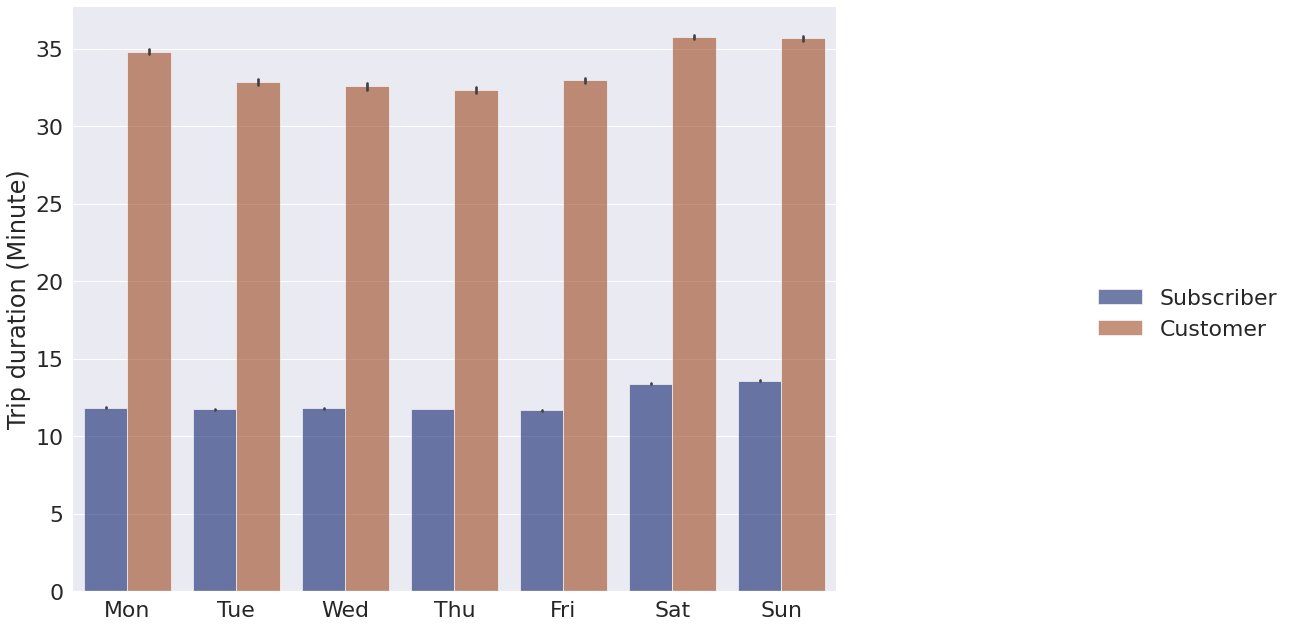

In [ ]:
sns.set_theme(style="whitegrid")

sns.set(font_scale = 2)

g = sns.catplot(
    data=df, kind="bar",
    x="day_of_week", y="ride_lenght_min", hue="usertype" ,
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)

g.set_axis_labels("", "Trip duration (Minute)")
g.legend.set_title("")
g.fig.set_size_inches(20,10)

In [ ]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min,day_of_week,year,month,day,season,date_offset
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23,5,Mon,2018,Jan,1,winter,1081
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0 days 00:06:17,6,Mon,2018,Jan,1,winter,1081
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0 days 00:48:24,48,Mon,2018,Jan,1,winter,1081
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0 days 00:12:27,12,Mon,2018,Jan,1,winter,1081
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0 days 00:03:03,3,Mon,2018,Jan,1,winter,1081


In [ ]:
(df.loc[df.usertype == 'Subscriber'])['ride_lenght_min'].sum()


33783705

In [ ]:
(df.loc[df.usertype == 'Customer'])['ride_lenght_min'].sum()


21993892

In [ ]:
df['usertype'].value_counts()

Subscriber    2794671
Customer       640852
Name: usertype, dtype: int64

**Comparison between total number of customers and total number of subscribers**

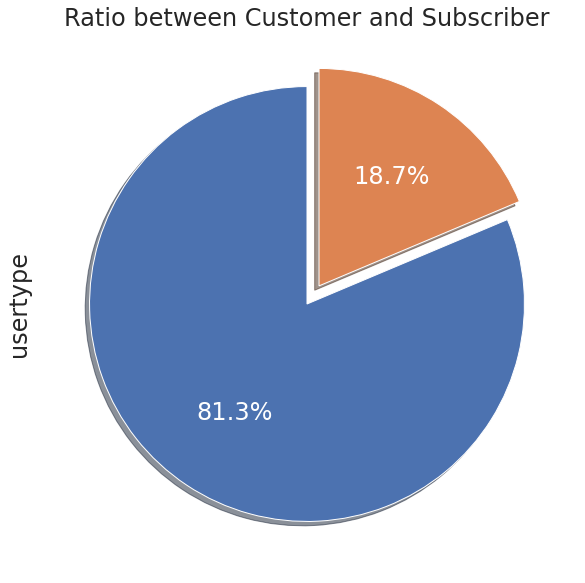

In [ ]:
df['usertype'].value_counts().plot(kind='pie', explode = (0, 0.1), 
                                   autopct='%1.1f%%', shadow=True, startangle=90,
                                   title = 'Ratio between Customer and Subscriber',
                                   figsize = (10,10),  textprops=dict(color="w"))
import matplotlib as mpl
mpl.rcParams['font.size'] = 30

**Comparison between total trip duration of customers vs total trip duration of subscribers**

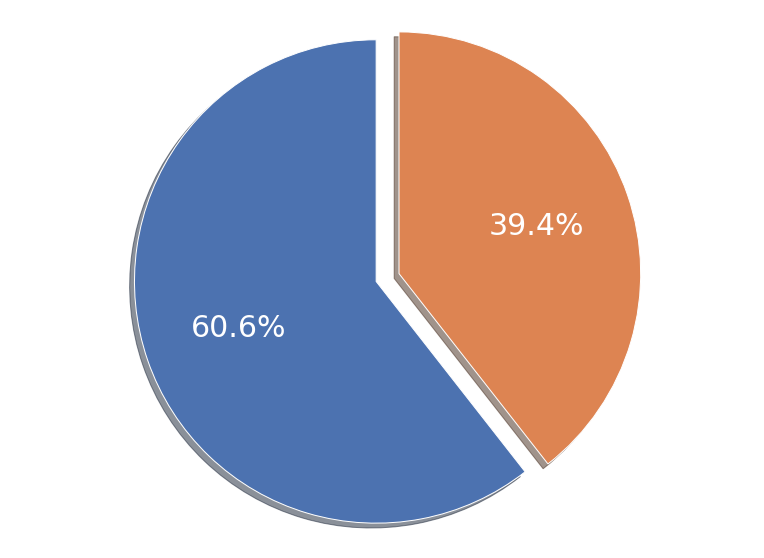

In [ ]:
import matplotlib.pyplot as plt
explode = (0, 0.1)
labels = 'Subscriber', 'Customer'

fig1, ax1 = plt.subplots()
ax1.pie([(df.loc[df.usertype == 'Subscriber'])['ride_lenght_min'].sum(),(df.loc[df.usertype == 'Customer'])['ride_lenght_min'].sum()], 
        explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops=dict(color="w"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

import matplotlib as mpl
mpl.rcParams['font.size'] = 5

fig1.set_size_inches(10, 10)


plt.show()

**Trip duration comparison over the year**

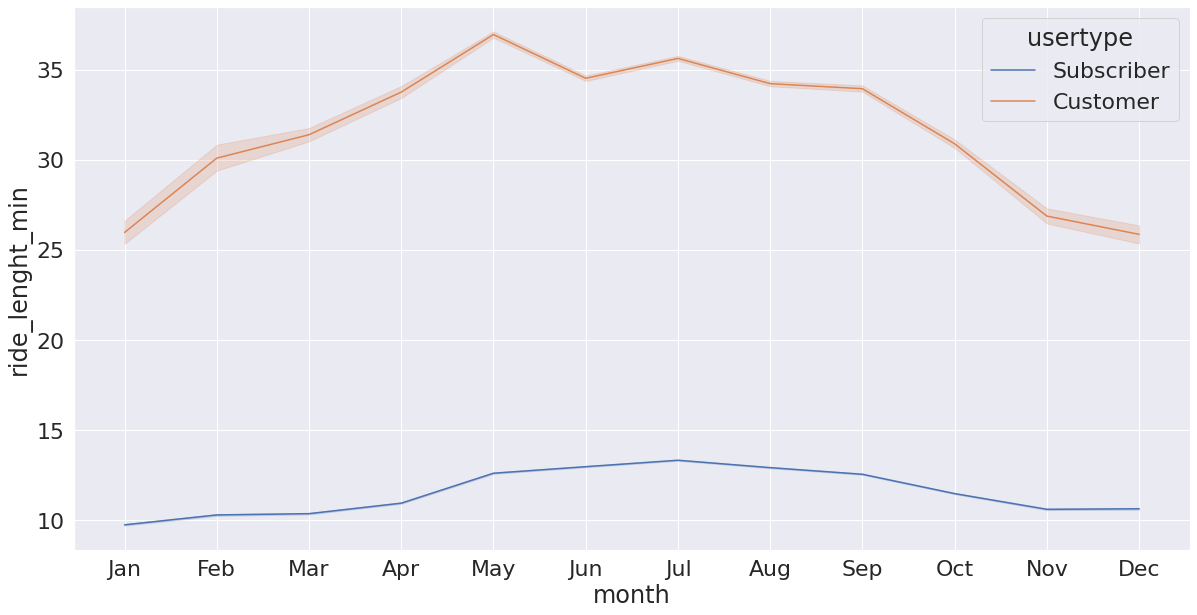

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(20,10))


sns.lineplot(x="month", y="ride_lenght_min",
             hue="usertype", data=df, ax=ax)

(array([2.012881e+06, 5.837550e+05, 1.519100e+05, 3.199000e+04,
        6.815000e+03, 3.207000e+03, 1.768000e+03, 1.061000e+03,
        7.710000e+02, 5.130000e+02]),
 array([  3. ,  14.8,  26.6,  38.4,  50.2,  62. ,  73.8,  85.6,  97.4,
        109.2, 121. ]),
 <a list of 10 Patch objects>)

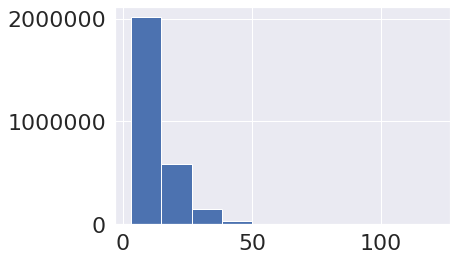

In [ ]:
plt.hist(df['ride_lenght_min'].loc[df['usertype'] == 'Subscriber'], plt.ticklabel_format(style = 'plain'))




**Ride pattern of customers**

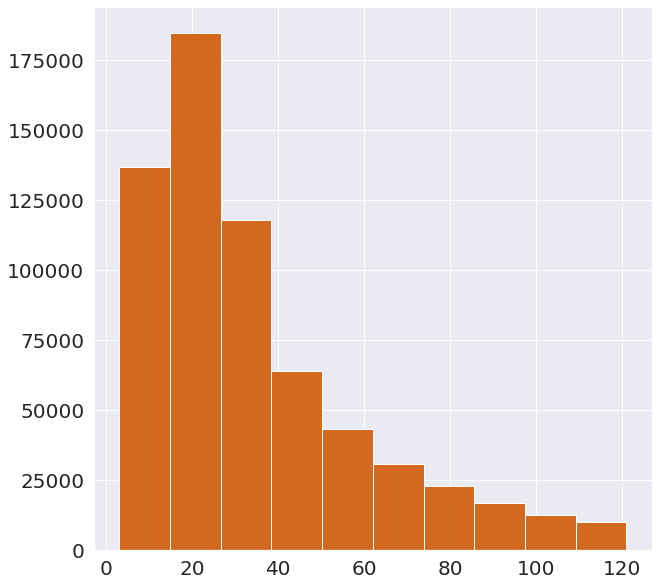

In [ ]:
df['ride_lenght_min'].loc[df['usertype'] == 'Customer'].hist(bins=10, color='chocolate', figsize = (10,10), xlabelsize = 20, ylabelsize = 20)


**Ride pattern of subscribers**

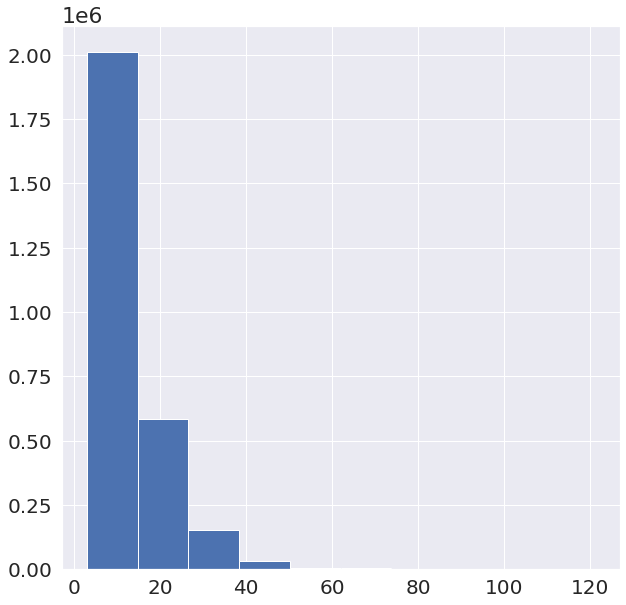

In [ ]:
df['ride_lenght_min'].loc[df['usertype'] == 'Subscriber'].hist(bins=10, figsize = (10,10), xlabelsize = 20, ylabelsize = 20)

In [ ]:
df['ride_lenght_min'].describe()

count    3.435523e+06
mean     1.623555e+01
std      1.621383e+01
min      3.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      2.000000e+01
max      1.210000e+02
Name: ride_lenght_min, dtype: float64

In [ ]:
df.groupby('from_station_name').count()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min,day_of_week,year,month,day,season,date_offset
from_station_name,,,,,,,,,,,,,,,,,,,
2112 W Peterson Ave,450,450,450,450,450,450,450,450,450,388,389,450,450,450,450,450,450,448,450
63rd St Beach,878,878,878,878,878,878,878,878,878,504,505,878,878,878,878,878,878,877,878
900 W Harrison St,5718,5718,5718,5718,5718,5718,5718,5718,5718,5319,5323,5718,5718,5718,5718,5718,5718,5710,5718
Aberdeen St & Jackson Blvd,11204,11204,11204,11204,11204,11204,11204,11204,11204,10599,10609,11204,11204,11204,11204,11204,11204,11184,11204
Aberdeen St & Monroe St,9506,9506,9506,9506,9506,9506,9506,9506,9506,9119,9121,9506,9506,9506,9506,9506,9506,9479,9506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood St & Taylor St,5839,5839,5839,5839,5839,5839,5839,5839,5839,5666,5671,5839,5839,5839,5839,5839,5839,5825,5839
Woodlawn Ave & 55th St,3038,3038,3038,3038,3038,3038,3038,3038,3038,2645,2665,3038,3038,3038,3038,3038,3038,3033,3038
Woodlawn Ave & 75th St,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29


In [ ]:
top_10_S = df['from_station_name'].loc[df['usertype'] == 'Subscriber'].value_counts().nlargest(10).index.tolist()
top_10_S

['Canal St & Adams St',
 'Clinton St & Madison St',
 'Clinton St & Washington Blvd',
 'Canal St & Madison St',
 'Daley Center Plaza',
 'Kingsbury St & Kinzie St',
 'Michigan Ave & Washington St',
 'Franklin St & Monroe St',
 'Columbus Dr & Randolph St',
 'Orleans St & Merchandise Mart Plaza']

In [ ]:
top_10_C = df['from_station_name'].loc[df['usertype'] == 'Customer'].value_counts().nlargest(10).index.tolist()
top_10_C

['Streeter Dr & Grand Ave',
 'Lake Shore Dr & Monroe St',
 'Millennium Park',
 'Shedd Aquarium',
 'Michigan Ave & Oak St',
 'Lake Shore Dr & North Blvd',
 'Theater on the Lake',
 'Adler Planetarium',
 'Dusable Harbor',
 'Michigan Ave & Washington St']

Finally I created a table contains the top 10 stations visited by the customers and subscribers

In [ ]:
top_places = pd.DataFrame(data = {'Most visited station by Customers': top_10_C,'Most visited station by Subscribers': top_10_S} )
top_places.head(10)

,Most visited station by Customers,Most visited station by Subscribers
0,Streeter Dr & Grand Ave,Canal St & Adams St
1,Lake Shore Dr & Monroe St,Clinton St & Madison St
2,Millennium Park,Clinton St & Washington Blvd
3,Shedd Aquarium,Canal St & Madison St
4,Michigan Ave & Oak St,Daley Center Plaza
5,Lake Shore Dr & North Blvd,Kingsbury St & Kinzie St
6,Theater on the Lake,Michigan Ave & Washington St
7,Adler Planetarium,Franklin St & Monroe St
8,Dusable Harbor,Columbus Dr & Randolph St
9,Michigan Ave & Washington St,Orleans St & Merchandise Mart Plaza


In [ ]:
df.shape

(3435523, 20)

In [ ]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_lenght,ride_lenght_min,day_of_week,year,month,day,season,date_offset
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,0 days 00:05:23,5,Mon,2018,Jan,1,winter,1081
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,0 days 00:06:17,6,Mon,2018,Jan,1,winter,1081
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,0 days 00:48:24,48,Mon,2018,Jan,1,winter,1081
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,0 days 00:12:27,12,Mon,2018,Jan,1,winter,1081
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,0 days 00:03:03,3,Mon,2018,Jan,1,winter,1081


# Conclusion
In a few words, the summary of my analysis:

* Casual riders tend to ride longer than subscribers.

* The trip duration of casual riders varies a lot where the trip duration of subscribers is more constant.

* Both casual riders and subscribers tend to ride more over the weekends.

* Both casual riders and subscribers tend to ride longer in the summer and shorter in the winter, but the trip duration of subscribers are more constant than casual riders.

* Stations commonly used by casual riders differ from station commonly used by subscribers.



# Recommendation
Based on my analysis, my recommendation is:


* Attract casual riders by adjusting the price of membership where it would be cheaper to have annual membership for riders who tend to take longer trips.

* Run more ad campaigns over the weekends in the app.

* Give attractive offers for annual memberships right before the beginning of summer.

* Show more ads on the stations which are used more by the casual riders.

[Link to my article about the project](https://ekram49.github.io/2021-07-31-Cyclistic/)

[My Github](https://github.com/Ekram49)

[My LinkedIn](https://www.linkedin.com/in/ekram-ullah-ahmed/)